## Trending analysis of music preferences

#### Import library and package

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

#### Load data

In [2]:
df_normal  = pd.read_csv('list_info.csv') # Load các thông tin các video về âm nhạc thường
df_normal.head()


,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,120741,NaN,NaN,0,26.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H13M25S,2d,...,False,public,True,False,88228,NaN,NaN,0,40.0,['https://en.wikipedia.org/wiki/Electronic_mus...
2,zNOA_dLU3NM,2022-06-29T09:49:28Z,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,ACV Ballad,"['acv', 'acv ballad', 'nhạc trẻ', 'nhac tre', ...",22,NaN,PT1H36M33S,2d,...,False,public,True,False,3442,30.0,NaN,0,0.0,['https://en.wikipedia.org/wiki/Music']
3,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc trẻ remix', 'nhạc remix', 'nhac tre rem...",10,NaN,PT1H20M44S,2d,...,False,public,True,False,94147,NaN,NaN,0,26.0,['https://en.wikipedia.org/wiki/Electronic_mus...
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,187001,747.0,NaN,0,18.0,"['https://en.wikipedia.org/wiki/Music', 'https..."


In [3]:
# Xem thông tin tổng quan về data frame
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3073 non-null   object 
 1   publishAt             3073 non-null   object 
 2   title                 3073 non-null   object 
 3   description           3023 non-null   object 
 4   channelTitle          3073 non-null   object 
 5   tags                  2633 non-null   object 
 6   categoryId            3073 non-null   int64  
 7   defaultAudioLanguage  1565 non-null   object 
 8   duration              3073 non-null   object 
 9   dimension             3073 non-null   object 
 10  definition            3073 non-null   object 
 11  caption               3073 non-null   bool   
 12  privacyStatus         3073 non-null   object 
 13  embeddable            3073 non-null   bool   
 14  madeForKids           3073 non-null   bool   
 15  viewCount            

In [4]:
# Filter out music videos ie categoryId is 10 – Music
df_normal = df_normal[df_normal['categoryId']==10]

In [5]:
# Handling null values ​​in data frames
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'' })
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,120741,0.0,0.0,0,26.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H13M25S,2d,...,False,public,True,False,88228,0.0,0.0,0,40.0,['https://en.wikipedia.org/wiki/Electronic_mus...
3,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc trẻ remix', 'nhạc remix', 'nhac tre rem...",10,,PT1H20M44S,2d,...,False,public,True,False,94147,0.0,0.0,0,26.0,['https://en.wikipedia.org/wiki/Electronic_mus...
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,187001,747.0,0.0,0,18.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say thì cứ say yêu thì bỏ đi', 'Liên Khúc Nh...",10,,PT2H15M17S,2d,...,False,public,True,False,1226523,4479.0,0.0,0,82.0,['https://en.wikipedia.org/wiki/Electronic_mus...


In [6]:
# Mô tả các thuộc tính có giá trị nguyên
df_normal.describe()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
count,2017.0,2.017000e+03,1.550000e+03,0.0,2017.0,2011.000000
mean,10.0,3.873928e+06,8.081111e+04,NaN,0.0,2402.290403
std,0.0,2.202867e+07,3.748313e+05,NaN,0.0,14463.857604
min,10.0,0.000000e+00,0.000000e+00,NaN,0.0,0.000000
25%,10.0,2.093800e+04,4.730000e+02,NaN,0.0,9.000000
50%,10.0,1.503780e+05,3.029000e+03,NaN,0.0,45.000000
75%,10.0,6.434780e+05,1.599100e+04,NaN,0.0,190.000000
max,10.0,5.539953e+08,6.292895e+06,NaN,0.0,302920.000000


In [7]:
# Draw a statistical pie chart according to the number of views of the videos
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video 10 thousand views', 'Video 100 thousand views', 'Video million views', 'Video 10 million views', 'Video 100 million views']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


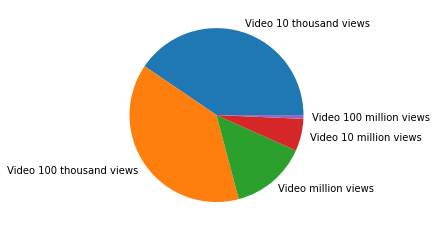

In [8]:
pieCharViewCounts(df_normal)

#### Xử lý tag và tên channel (thêm "_" vào các tag)


In [9]:
df_normal_preprocessed['tags'].fillna('', inplace=True)

In [10]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [11]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

0       ['acv trending', 'acv', 'nhac tre moi nhat', '...
1       ['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...
3       ['nhạc trẻ remix', 'nhạc remix', 'nhac tre rem...
4       ['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...
5       ['Say thì cứ say yêu thì bỏ đi', 'Liên Khúc Nh...
                              ...                        
3066    ['lofi', 'lofi chill', 'lofi việt', 'lofi việt...
3067    ['ChewChew Lofi', 'chewchew lofi', 'speed up',...
3068    ['nhạc chill', 'nhạc chill tiktok', 'nhac quoc...
3070    ['morning vibes', 'morning vibes songs', 'chil...
3071                                                     
Name: tags, Length: 2017, dtype: object


#### Handling topic categories

In [12]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [13]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace("'Music'",'')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))

 Pop_music
Electronic_music 
Electronic_music  Pop_music
 Music_of_Asia Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music 
Electronic_music 
Electronic_music 
 Pop_music
Electronic_music  Pop_music
 Pop_music
Electronic_music 
 Pop_music
Electronic_music  Pop_music
Classical_music Electronic_music 
Electronic_music  Pop_music
 Pop_music

 Music_of_Asia Pop_music

Electronic_music 
 Pop_music

Electronic_music  Pop_music
 Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
 Music_of_Asia Pop_music


Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Music_of_Asia Pop_music
Electronic_music  Pop_music

Electronic_music  Music_of_Asia Pop_music



Electronic_music 

Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic

In [14]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,120741,0.0,0.0,0,26.0,Pop_music
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H13M25S,2d,...,False,public,True,False,88228,0.0,0.0,0,40.0,Electronic_music
3,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc_trẻ_remix', 'nhạc_remix', 'nhac_tre_rem...",10,,PT1H20M44S,2d,...,False,public,True,False,94147,0.0,0.0,0,26.0,Electronic_music Pop_music
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,187001,747.0,0.0,0,18.0,Music_of_Asia Pop_music
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,False,public,True,False,1226523,4479.0,0.0,0,82.0,Electronic_music Pop_music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,eKrWDOOD398,2022-06-29T12:15:01Z,"[playlist104] - slowed - nụ cười em là nắng, t...",các bạn nên đeo tai nghe để có trải nghiệm tốt...,flechazowu,"['lofi', 'lofi_chill', 'lofi_việt', 'lofi_việt...",10,vi,PT52M59S,2d,...,False,public,True,False,1649,0.0,0.0,0,9.0,
3067,cCHSS-AEG4s,2022-06-28T09:00:28Z,#4 [Playlist] Speed up nhạc Việt này sẽ giúp b...,#4 [Playlist] Speed up nhạc Việt này sẽ giúp b...,ChewChew Lofi,"['ChewChew_Lofi', 'chewchew_lofi', 'speed_up',...",10,,PT33M46S,2d,...,False,public,True,False,14,0.0,0.0,0,0.0,Electronic_music
3068,vRc4_srmwew,2022-06-28T00:00:30Z,Tổng Hơp Những Bản Nhạc Us Uk Hay Nhất - Những...,Tổng Hơp Những Bản Nhạc Us Uk Hay Nhất - Những...,Nhạc Chill,"['nhạc_chill', 'nhạc_chill_tiktok', 'nhac_quoc...",10,en,PT1H6M15S,2d,...,False,public,True,False,1418,10.0,0.0,0,1.0,Electronic_music Pop_music
3070,33BKTPtaVMQ,2022-06-23T01:00:01Z,Good Tiktok Songs ~ Chill Music Palylist ~ Eng...,Good Tiktok Songs ~ Chill Music Palylist ~ Eng...,Deep Chill Mix,"['morning_vibes', 'morning_vibes_songs', 'chil...",10,en,PT1H18M38S,2d,...,False,public,True,False,107163,1290.0,0.0,0,37.0,Pop_music


#### Handling time

In [15]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [16]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishAt'].split('-',1)[0]))
    months.append(int(row['publishAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [17]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,0,26.0,Pop_music,1,38,44,2022,6,27,5924
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H13M25S,2d,...,0,40.0,Electronic_music,1,13,25,2022,6,29,4405
3,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc_trẻ_remix', 'nhạc_remix', 'nhac_tre_rem...",10,,PT1H20M44S,2d,...,0,26.0,Electronic_music Pop_music,1,20,44,2022,6,28,4844
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,0,82.0,Electronic_music Pop_music,2,15,17,2022,4,11,8117


#### Handling name of video

In [18]:
# Function to remove some interfering words
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### Process column values to integers

In [19]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [20]:
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,0,26.0,Pop_music,1,38,44,2022,6,27,5924
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H13M25S,2d,...,0,40.0,Electronic_music,1,13,25,2022,6,29,4405
3,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc_trẻ_remix', 'nhạc_remix', 'nhac_tre_rem...",10,,PT1H20M44S,2d,...,0,26.0,Electronic_music Pop_music,1,20,44,2022,6,28,4844
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635
5,5BQKXF56e8A,2022-04-11T12:00:03Z,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...,Sai Gon Music,"['Say_thì_cứ_say_yêu_thì_bỏ_đi', 'Liên_Khúc_Nh...",10,,PT2H15M17S,2d,...,0,82.0,Electronic_music Pop_music,2,15,17,2022,4,11,8117


##### Distribution of videos by number of views, like

(array([1.498e+03, 3.100e+01, 9.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([      0. ,  629289.5, 1258579. , 1887868.5, 2517158. , 3146447.5,
        3775737. , 4405026.5, 5034316. , 5663605.5, 6292895. ]),
 <BarContainer object of 10 artists>)

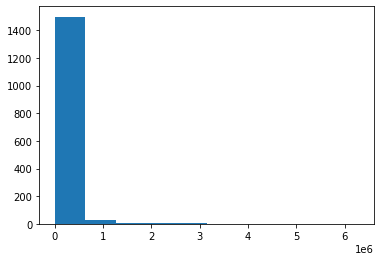

In [21]:
plt.hist(df_normal['likeCount'])

(array([1059.,  140.,   54.,   38.,   25.,   16.,   16.,   19.,   12.,
           6.]),
 array([    0. ,  9880.9, 19761.8, 29642.7, 39523.6, 49404.5, 59285.4,
        69166.3, 79047.2, 88928.1, 98809. ]),
 <BarContainer object of 10 artists>)

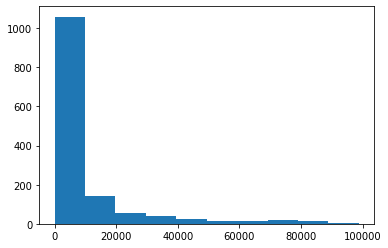

In [22]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

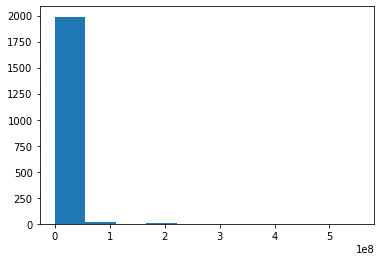

In [23]:
plt.hist(df_normal['viewCount']);

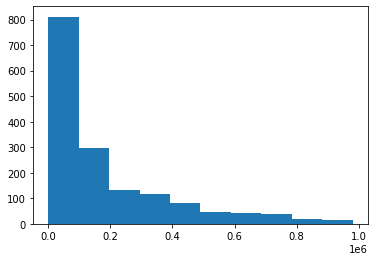

In [24]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount']);

(array([1.454e+03, 4.980e+02, 3.500e+01, 7.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.800e+01]),
 array([    0.,  4366.,  8732., 13098., 17464., 21830., 26196., 30562.,
        34928., 39294., 43660.]),
 <BarContainer object of 10 artists>)

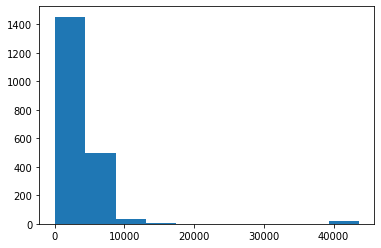

In [25]:
plt.hist(df_normal_preprocessed['durationInt'])

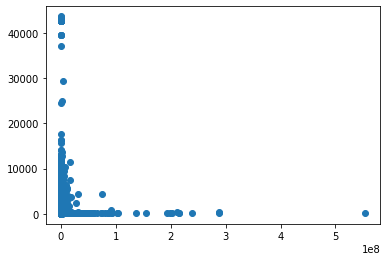

In [26]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

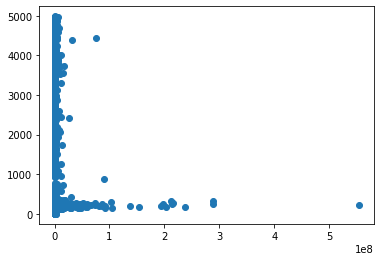

In [27]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/1613510240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


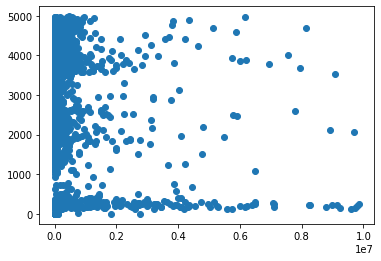

In [28]:

plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])

##### The relationship between attributes

In [29]:
corr = df_normal_preprocessed.corr()
print(df_normal_preprocessed.head(5))

            id             publishAt  \
0  _7UyRLB1HVg  2022-06-27T09:33:26Z   
1  CRW2YqJs-J4  2022-06-29T01:00:01Z   
3  8-933tJOtSY  2022-06-28T22:59:50Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5  5BQKXF56e8A  2022-04-11T12:00:03Z   

                                               title  \
0  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...   
1  NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...   
3  EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...   
4  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...   
5  Say thì cứ say yêu thì bỏ đi - Liên Khúc Nhạc ...   

                                         description        channelTitle  \
0  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...  ACV Music Trending   
1  NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...         Orinn Remix   
3  EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...            Min Xinh   
4  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...  TPT Music For Life   
5  Say thì cứ say yêu thì bỏ đi - Liên Khú

In [30]:
df_normal_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 3071
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2017 non-null   object 
 1   publishAt             2017 non-null   object 
 2   title                 2017 non-null   object 
 3   description           2017 non-null   object 
 4   channelTitle          2017 non-null   object 
 5   tags                  2017 non-null   object 
 6   categoryId            2017 non-null   int64  
 7   defaultAudioLanguage  2017 non-null   object 
 8   duration              2017 non-null   object 
 9   dimension             2017 non-null   object 
 10  definition            2017 non-null   int64  
 11  caption               2017 non-null   int64  
 12  privacyStatus         2017 non-null   int64  
 13  embeddable            2017 non-null   int64  
 14  madeForKids           2017 non-null   int64  
 15  viewCount            

<AxesSubplot:>

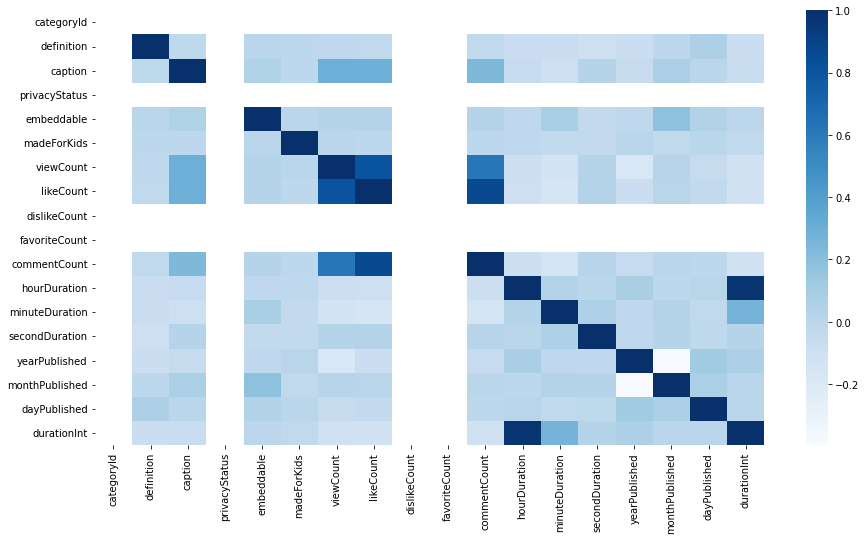

In [31]:
plt.figure(figsize=(15,8))
heatmap_df_normal_preprocess = df_normal_preprocessed[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']]
corr = df_normal_preprocessed.corr()
sns.heatmap(corr, cmap='Blues')

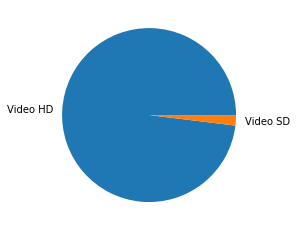

In [32]:
# plt.figure(figsize=(8,16))

# plt.scatter(df_normal_preprocessed['definition'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

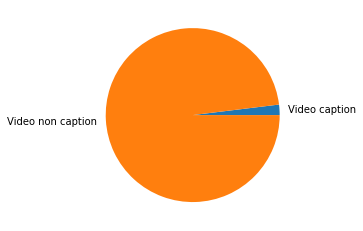

In [33]:
# plt.scatter(df_normal_preprocessed['caption'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Caption')
# plt.xlabel('Caption')
# plt.ylabel('View count')

df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

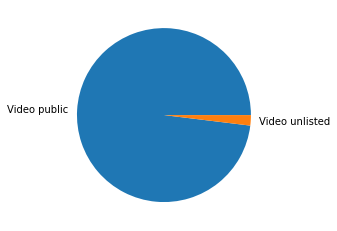

In [34]:
# plt.scatter(df_normal_preprocessed['privacyStatus'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

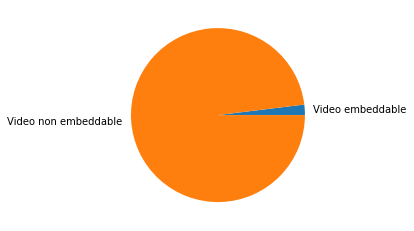

In [35]:
# plt.scatter(df_normal_preprocessed['embeddable'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['embeddable'].unique()

embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

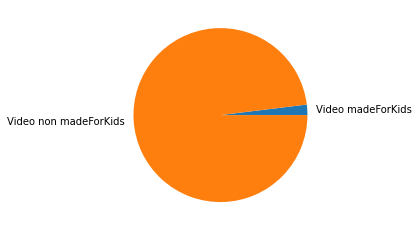

In [36]:
# plt.scatter(df_normal_preprocessed['madeForKids'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['madeForKids'].unique()
# test = df_normal[df_normal['madeForKids']==False]
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Convert text to vector IF TDF

In [37]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
    # Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nNumber of words in the dictionary: {len(module_count_vector.vocabulary_)}")
    print(f"Data size after processing: {data_preprocessed.shape}")
    print(f"View the words in the dictionary: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed


In [38]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))


Number of words in the dictionary: 2538
Data size after processing: (2017, 2538)
View the words in the dictionary: {'trẻ': 2154, 'mới': 1383, 'hay': 855, 'nhất': 1469, '2022': 53, 'liên': 1158, 'khúc': 1055, 'hiện': 883, 'nay': 1406, 'chọn': 433, '129': 34, 'remix': 1726, 'edm': 655, 'tiktok': 2075, 'orinn': 1550, 'lk': 1161, 'bxh': 356, 'top': 2105, '15': 37, 'bản': 367, '40': 77, 'hàng': 912, 'triệu': 2132, 'view': 2256, 'bảng': 368, 'xếp': 2374, 'hạng': 927, 'hits': 881, 'say': 1802, 'thì': 2052, 'cứ': 521, 'yêu': 2399, 'bỏ': 375, 'đi': 2423, 'thất': 2060, 'tình': 2181, 'cấm': 514, 'nghe': 1424, 'về': 2295, 'đêm': 2443, '20': 46, 'một': 1382, 'ngàn': 1438, 'nỗi': 1523, 'đau': 2422, 'văn': 2287, 'mai': 1237, 'hương': 925, 'hot': 895, 'gây': 823, 'nghiện': 1428, 'nonstop': 1495, 'vinahouse': 2262, 'việt': 2269, 'mix': 1312, 'dj': 586, 'bass': 255, 'cực': 524, 'mạnh': 1373, 'đế': 2465, 'vương': 2289, 'ai': 147, 'chung': 414, 'được': 2456, 'mãi': 1360, '2021': 52, '29': 64, 'không': 10

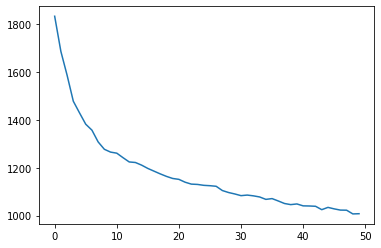

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [40]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.00195409, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00042064, 0.00032119, ..., 0.0004189 , 0.0004189 ,
        0.0004189 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(2017,)
7
4
4
8
8
4
8
8
8
8
8
8
8
8
8
2
5
8
8
8
3
7
7
7
8
8
4
8
8
8
8
8
8
7
8
4
4
4
8
4
7
8
7
8
7
4
7
7
7
7
7
4
7
8
7
7
7
7
8
4
4
4
7
7
4
7
7
4
8
4
4
7
4
7
8
7
8
4
4
7
7
4
4
4
7
7
8
4
7
7
4
7
7
4
4
7
4
4
4
7
8
4
7
7
7
7
4
4
4
7
8
7
7
7
8
4
7
7
4
4
8
4
7
7
4
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
0
0
0
0
0
0
0
0
0
0
0
0
0
6
8
0
6
2
6
6
6
6
2
8
2
8
8
8
8
6
8
8
6
6
2
6
8
9
9
8
8
8
8
2
6
6
6
6
8
6
6
8
6
6
8
6
6
6
6
8
6
6
8
6
6
8
6
2
2
8
6
8
9
8
2
6
2
6
6
6
6
6
6
6
6
6
2
6
8
6
6
6
6
6
9
2
2
6
2
6


In [42]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 0 to 3071
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2017 non-null   object 
 1   publishAt             2017 non-null   object 
 2   title                 2017 non-null   object 
 3   description           2017 non-null   object 
 4   channelTitle          2017 non-null   object 
 5   tags                  2017 non-null   object 
 6   categoryId            2017 non-null   int64  
 7   defaultAudioLanguage  2017 non-null   object 
 8   duration              2017 non-null   object 
 9   dimension             2017 non-null   object 
 10  definition            2017 non-null   int64  
 11  caption               2017 non-null   int64  
 12  privacyStatus         2017 non-null   int64  
 13  embeddable            2017 non-null   int64  
 14  madeForKids           2017 non-null   int64  
 15  viewCount            

In [43]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()



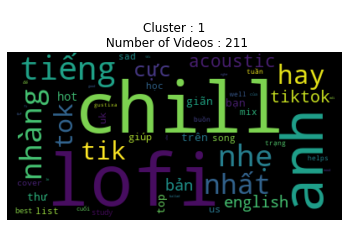

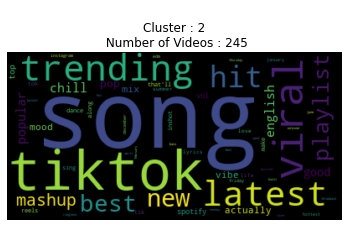

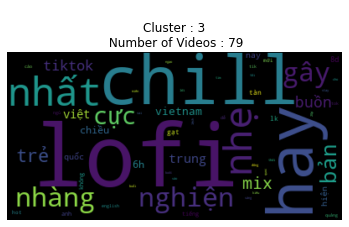

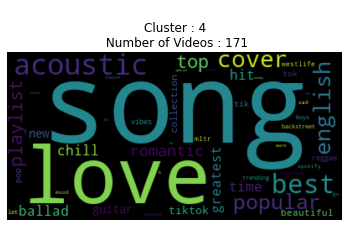

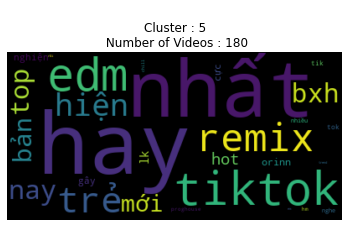

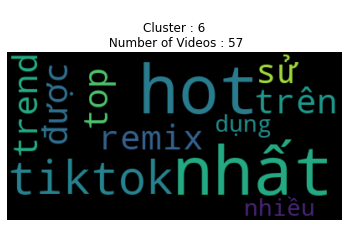

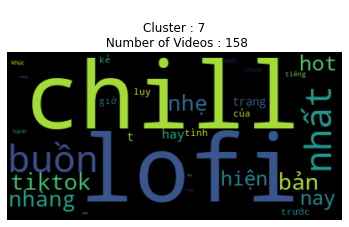

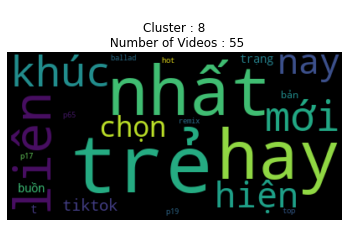

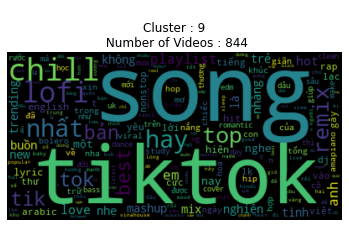

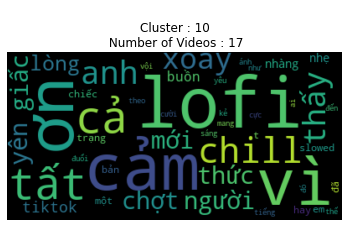

In [44]:
drawWordCloud(temp_df,'title', stopwords)

0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


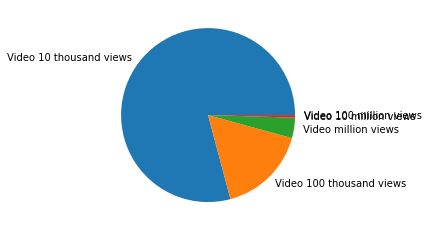

1


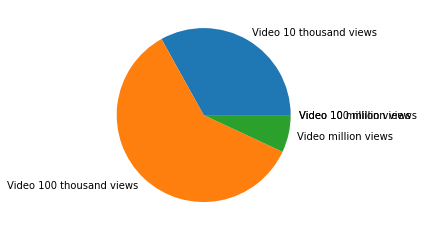

2


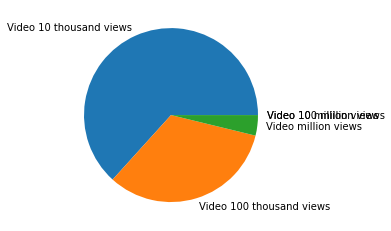

3


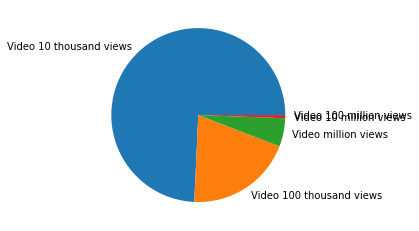

4


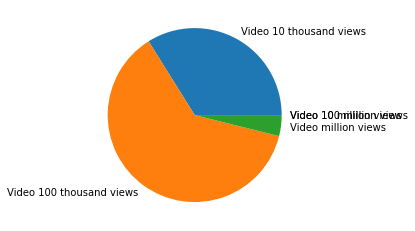

5


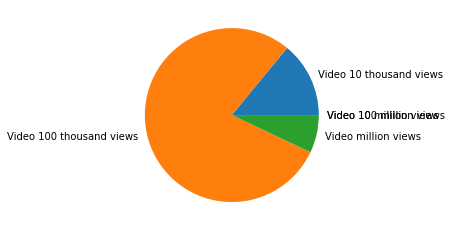

6


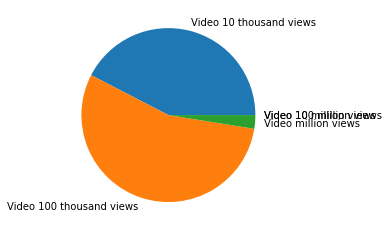

7


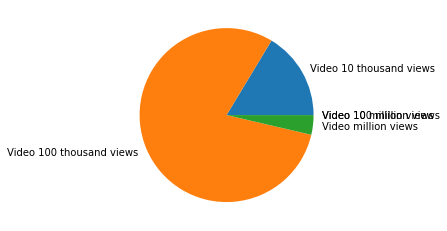

8


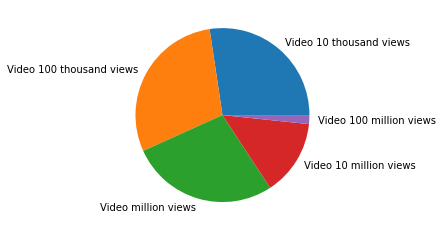

9


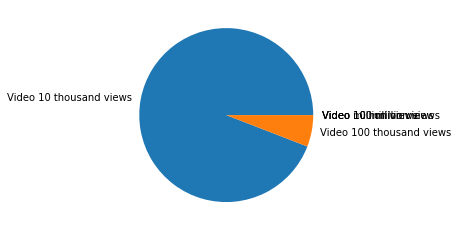

In [45]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [46]:
clustered_df = temp_df.groupby(['label']).sum()

In [47]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

,viewCount,likeCount,durationInt
label,,,
0,50359953,713314.0,643575
1,95453887,1068172.0,1232627
2,13218511,124409.0,273591
3,51683413,336864.0,1122282
4,54994607,1300075.0,840056
5,29884662,442186.0,252214
6,24247314,482415.0,617898
7,16560254,21499.0,314865
8,7476312671,120730771.0,2022791


In [48]:
abnormal_cluster = temp_df[temp_df['label']==6]
# abnormal_cluster = abnormal_cluster[abnormal_cluster['label']==2]

In [49]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


Number of words in the dictionary: 32
Data size after processing: (158, 32)
View the words in the dictionary: {'chill': 7, 'tiktok': 26, 'bản': 6, 'lofi': 18, 'tiếng': 27, 'anh': 4, 'nhẹ': 24, 'nhàng': 22, 'buồn': 5, 'hot': 13, 'nhất': 23, 'hiện': 12, 'nay': 21, '2022': 2, 'khúc': 16, 'thịnh': 25, 'hành': 14, 'hay': 11, 'trạng': 30, 'của': 9, 'kẻ': 17, 'lụy': 20, 'tình': 31, 'trước': 29, 'giờ': 10, 'cho': 8, 'top': 28, '20': 0, '2021': 1, 'không': 15, 'lời': 19, '40': 3}
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
(158,)
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
2
1
0
0
0
1
4
4
3
0
4
1
4
4
1
4
4
4
0
4
4
0
4
3
2
4
0
0
0
4
4
0
2
4
0
0
0
1
1
1
0
1
1
0
0
1
0
1
0
2
3
3
0
1
3
1
0
0
0
0
0


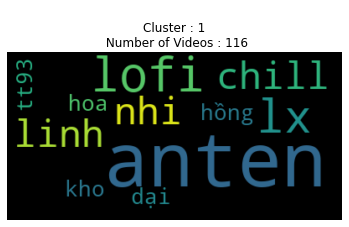

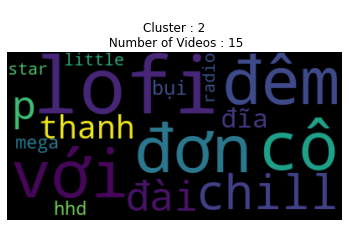

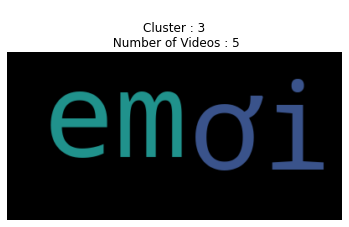

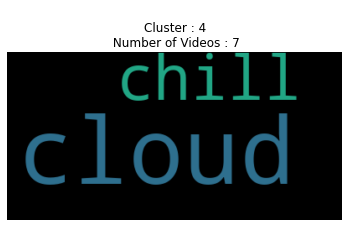

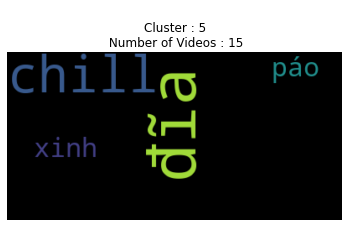

In [50]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_23212/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


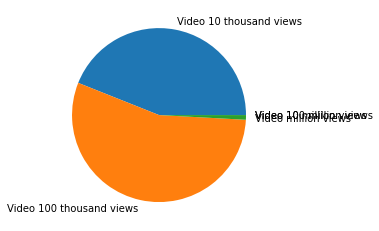

1


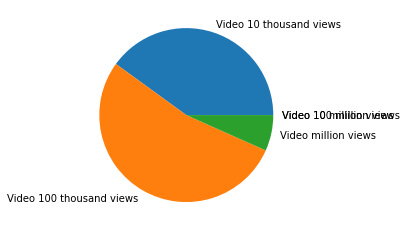

2


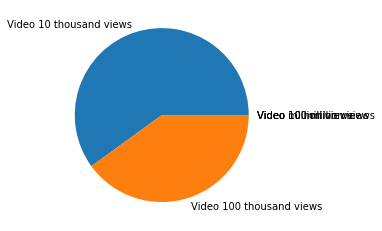

3


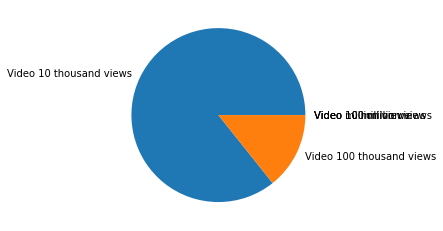

4


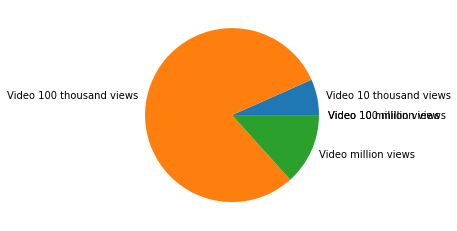

In [51]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [52]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      23554063
likeCount      482415.0
durationInt      592901
dtype: object

In [53]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      693251
likeCount         0.0
durationInt     24997
dtype: object

In [54]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Nhạc Lofi Buồn Hot Nhất Hiện Nay - Những Bản Nhạc Lofi Chill Nhẹ Nhàng
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Nhạc Lofi Buồn Hot Nhất Hiện Nay - Những Bản Nhạc Lofi Chill Nhẹ Nhàng
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay
Nhạc Chill TikTok - Những Bản Nhạc Lofi Chill Nhẹ Nhàng - Nhạc Lofi Buồn Hot Nhất Hiện Nay

In [55]:
print(wordcloud.words_)

{'đĩa': 1.0, 'chill': 1.0, 'páo': 0.07142857142857142, 'xinh': 0.07142857142857142}
